# Introduction

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

You can find the TAFE exit survey here and the survey for the DETE here. We've made some slight modifications to these datasets to make them easier to work with, including changing the encoding to UTF-8 (the original ones are encoded using cp1252.)

In this project, we will answer the following questions:

    * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

    * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

    * ID: An id used to identify the participant of the survey
    * SeparationType: The reason why the person's employment ended
    * Cease Date: The year or month the person's employment ended
    * DETE Start Date: The year the person began employment with the DETE
    
Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

    * Record ID: An id used to identify the participant of the survey
    * Reason for ceasing employment: The reason why the person's employment ended
    * LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey['DETE Start Date'].value_counts().head()

Not Stated    73
2011          40
2007          34
2008          31
2010          27
Name: DETE Start Date, dtype: int64

There are 822 rows and 56 columns in the dete dataset. Be aware that there are many values 'Not Stated' in the dataset, which should be classified as missing values but they are not written as NaN.

In [5]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There are 702 entries and 72 columns in the dataset.

In [6]:
dete_survey.isnull().sum() # Find the total number of columns with no data

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [7]:
tafe_survey.isnull().sum() # Find the total number of columns with no data

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

### Observations

The following observations were made:
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


# Identify Missing Values and Drop Unnecessary Columns

Now, let's identify the missing values and represent them as NaN. We will also drop the colmns that we don't need for our analysis.

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated') # Reload dete_survey in pandas

In [9]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1) # Drop unnecessary columns

In [10]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1) # Drop unnecessary columns

We made a few changes by dropping columns from both datafreames that we won't need for our analysis. This will make our data easier to work with.

# Clean Column Names

We discovered that both dataframes contain many of the same columns, but with different column names. Let's standardize the column names to make both dataframes easier to combine.

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('\s+', ' ').str.lower() 
print(dete_survey_updated.columns)                   

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [12]:
tafe_survey_updated.rename({'Record ID': 'id'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'CESSATION YEAR': 'cease_date'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Reason for ceasing employment': 'separationtype'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Gender. What is your Gender?': 'gender'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'CurrentAge. Current Age': 'age'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Employment Type. Employment Type': 'employment_status'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Classification. Classification': 'position'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace = True, axis = 1)

We've renamed the column names for both dataframes so they can match.

# Filter the Data

Let's identify and remove more of the data we don't need.

In [13]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [14]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now, we standardized the name of columns used in our analysis.

In the dete_survey_updated dataframe, there are multiple separations types with the string 'Resignation'
Resignation - Other reasons
Resignation - Ohter employer
Resignation - Move overseas/interstate

The 'separationtype' columns in each dataframe describes a number of different separation tyypes. 

In this project, we will only analyze survey respondents who resigned, their separation type should contain only string 'Resignation'.

In [15]:
dete_survey_updated['separationtype'].value_counts() # reviewing the unique values in the separationtype column

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [16]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Now, let's select only the data for survey respondents who have a 'Resignation' separation type. 

However, we should remember that the dete_survey_updated dataframe contains three Resignation separation types. 

We want to select all of them.

In [17]:
resign1 = dete_survey_updated['separationtype'] == 'Resignation-Other reasons'
resign2 = dete_survey_updated['separationtype']== 'Resignation-Other employer'
resign3 = dete_survey_updated['separationtype']== 'Resignation-Move overseas/interstate'
combined = resign1 | resign2 | resign3
dete_resignations = dete_survey_updated[combined].copy()

In [18]:
resign = tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[resign].copy()

# Verify the Data

We've filtered the data and selected 'Resignation' in the tafe_survey_updated dataframe and the three separationtype in the dete_survey_updated dataframe.

Let's go ahead to verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

Here, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense. 

In this step, we'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date. 

* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [19]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [20]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [21]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

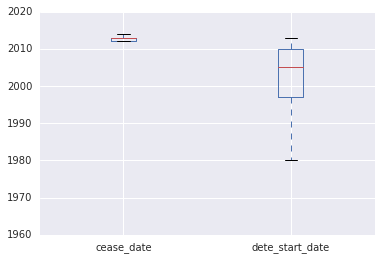

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
dete_resignations.boxplot(['cease_date', 'dete_start_date'])
plt.show()

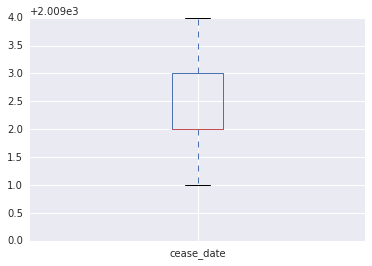

In [23]:
%matplotlib inline
tafe_resignations.boxplot(['cease_date'])
plt.show()

We can verify that:
* There aren't any major issues with the years.
* The years in each dataframe don't span quite the same number of years.

# Create a New Column

Now that we've verified the years in the dete_resignations dataframe, we'll use them to create a new column. 

Recall that our end goal is to answer the following question:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? 
* What about employees who have been at the job longer?

In the Human Resources field, the length of time an employee spent in a workplace is referred to as their years of service.

You may have noticed that the tafe_resignations dataframe already contains a "service" column, which we renamed to institute_service. 

In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations.

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date'] # Creating a new column (institite_service) 

We created a new column named institute_service in dete_resignations by subtracting the 'dete_start_date' column from the 'cease_date' column.

# Identify Dissatisfied Employees

We will use the new column to analyze survey respondents according to their length of employment.  We will also identify employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. If you disagree, feel free to modify them! Just make sure you explain why you made that decision.

1. tafe_survey_updated:
    * Contributing Factors. Dissatisfaction
    * Contributing Factors. Job Dissatisfaction

1. detesurveyupdated:

    * job_dissatisfaction
    * dissatisfaction_with_the_department
    * physical_work_environment
    * lack_of_recognition
    * lack_of_job_security
    * work_location
    * employment_conditions
    * work_life_balance
    * workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [27]:
def update_vals(val):
    if pd.isnull(val):
        return np.NaN
    elif val == '_':
        return False
    else:
        return True        
                


In [28]:
tafe_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[tafe_cols] = tafe_resignations[tafe_cols].applymap(update_vals)
tafe_resignations[tafe_cols]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True
10,True,True
13,True,True
14,True,True


If any of the mentioned columns in the two resignations dataframes contain a True value, we'll add a True value to a new column named dissatisfied.

* Return True if any element in the selected columns above is True
* Return False if none of the elements in the selected columns above is True
* Return NaN if the value is NaN

In [29]:
dete_cols = ['job_dissatisfaction'
        , 'dissatisfaction_with_the_department'
        , 'physical_work_environment'
        , 'lack_of_recognition'
        , 'lack_of_job_security'
        , 'work_location'
        , 'employment_conditions'
        , 'work_life_balance'
        , 'workload']
dete_resignations[dete_cols]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False


In [30]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_cols].any(axis = 1, skipna = False)
dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(axis = 1, skipna = False)

In [31]:
tafe_resignations_up= tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

True    332
NaN       8
Name: dissatisfied, dtype: int64

We have done the following:

* Renamed columns
* Dropped unnecessary data for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

# Combine the Data

We will now combine our datasets. Our goal is to aggregate the data according to the institute_service column.

In [32]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [33]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [34]:
combined_updated = combined.dropna(thresh = 500, axis =1)

Now, we've combined the dataset using pd.concat()

# Clean the Service Column

First, we'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms:


NaN                 88
Less than 1 year    73
1-2                 64
3-4                 63
5-6                 33
11-20               26
5.0                 23
1.0                 22
7-10                21
0.0                 20
...

To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

We'll use the slightly modified definitions below:

New: Less than 3 years at a company
Experienced: 3-6 years at a company
Established: 7-10 years at a company
Veteran: 11 or more years at a company

Let's categorize the values in the institute_service column using the definitions above.

In [35]:
combined_updated['institute_service'].value_counts().head(20)

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
Name: institute_service, dtype: int64

In [36]:
combined_updated_copy = combined_updated.copy()
years = combined_updated_copy['institute_service'].astype('str')
combined_updated_copy['institute_service'] = years.str.extract(r'(\d+)', expand=True).astype(float)

In [37]:
def mapvalue(val):
    if val < 3:
        return 'New'
    elif (val >= 3) & (val <= 6):
        return 'Experienced'
    elif (val >= 7) & (val <= 10):
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return 'Unknown'

In [38]:
service_cat = combined_updated_copy['institute_service'].apply(mapvalue)

We've extracted the years of service from each value in the institute_service column and successfully mapped each value to one of the career stage definitions above.

# Perform Initial Analysis

First let's confirm the number of True and False in the dissatisfied column.

In [39]:
combined_updated_copy['dissatisfied'].value_counts(dropna=False)

True     481
False    162
NaN        8
Name: dissatisfied, dtype: int64

In [40]:
combined_updated_copy['dissatisfied'] = combined_updated_copy['dissatisfied'].fillna(True)

In [41]:
combined_pv = combined_updated_copy.pivot_table(index=service_cat, values='dissatisfied', aggfunc=np.mean)

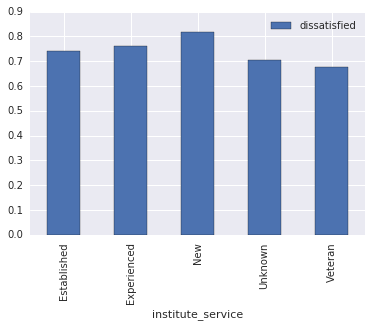

In [42]:
%matplotlib inline
combined_pv.plot(kind='bar')

# Conclusion

From the bar chart above, we can see that New Employees are the most dissatisfied. Veterans were the least dissatisfied.

This means that employees who only worked for the institutes for a short period of time resigned due to some kind of dissatisfaction. However, employees who have been there longer were the least dissatisfied.